In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

DATA_FOLDER = "../DATA/"

In [3]:
train = pd.read_parquet(DATA_FOLDER + "RAW/train.parq").dropna().drop_duplicates()
train

,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
0,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:exploit,0,6466,0
1,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:spam,0,6466,0
2,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:bruteforce,2,4637,0
3,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:spam,2,4637,0
4,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:exploit,2,4637,0
...,...,...,...,...,...,...,...,...,...,...,...
61629671,2023-08-24 21:14:59+00:00,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,http:bruteforce,9606,191439,0
61629673,2023-08-24 21:14:59+00:00,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,http:scan,9606,191439,0
61629674,2023-08-24 21:14:59+00:00,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,http:exploit,9606,191439,0
61629681,2023-08-24 21:14:46+00:00,US,22612.0,NAMECHEAP-NET,US,23033.0,WOW,http:scan,40383,193446,0


In [4]:
attacker = train[["attacker_country", "label"]]

attacker


,attacker_country,label
0,TR,0
1,TR,0
2,DE,0
3,DE,0
4,DE,0
...,...,...
61629671,US,0
61629673,US,0
61629674,US,0
61629681,US,0


In [5]:
attacker["attacker_country"].unique()

['TR', 'DE', 'GH', 'VN', 'US', ..., 'SH', 'GI', 'MQ', 'GD', 'FJ']
Length: 214
Categories (214, object): ['AD', 'AE', 'AF', 'AG', ..., 'YE', 'ZA', 'ZM', 'ZW']

In [6]:
attacker1 = attacker[attacker['label'] == 1]
attacker1

,attacker_country,label
83,RU,1
84,RU,1
1522,US,1
1523,US,1
2581,US,1
...,...,...
61629250,SG,1
61629372,US,1
61629375,US,1
61629389,SG,1


In [7]:
attacker1["attacker_country"].unique()

['RU', 'US', 'DE', 'AE', 'SG', ..., 'CI', 'NI', 'MW', 'AF', 'CR']
Length: 93
Categories (214, object): ['AD', 'AE', 'AF', 'AG', ..., 'YE', 'ZA', 'ZM', 'ZW']

In [8]:
country_with_attackers = attacker1.groupby('attacker_country').size().reset_index(name='count')
country_with_attackers



C:\Users\Francisco\AppData\Local\Temp\ipykernel_5436\2715870522.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_with_attackers = attacker1.groupby('attacker_country').size().reset_index(name='count')


,attacker_country,count
0,AD,0
1,AE,3787
2,AF,25
3,AG,0
4,AI,0
...,...,...
209,XK,11
210,YE,0
211,ZA,7061
212,ZM,0


In [9]:
import json

countries_df = pd.read_csv(DATA_FOLDER + "RAW/countries.csv")[["Alpha-2 code", "Alpha-3 code"]]


countries_json = countries_df.to_json(orient='records')


countries_list = json.loads(countries_json)

countries_dict = {item["Alpha-2 code"].strip(' "'): item["Alpha-3 code"].strip(' "') for item in countries_list}

countries_dict

{'AF': 'AFG',
 'AL': 'ALB',
 'DZ': 'DZA',
 'AS': 'ASM',
 'AD': 'AND',
 'AO': 'AGO',
 'AI': 'AIA',
 'AQ': 'ATA',
 'AG': 'ATG',
 'AR': 'ARG',
 'AM': 'ARM',
 'AW': 'ABW',
 'AU': 'AUS',
 'AT': 'AUT',
 'AZ': 'AZE',
 'BS': 'BHS',
 'BH': 'BHR',
 'BD': 'BGD',
 'BB': 'BRB',
 'BY': 'BLR',
 'BE': 'BEL',
 'BZ': 'BLZ',
 'BJ': 'BEN',
 'BM': 'BMU',
 'BT': 'BTN',
 'BO': 'BOL',
 'BA': 'BIH',
 'BW': 'BWA',
 'BV': 'BVT',
 'BR': 'BRA',
 'IO': 'IOT',
 'BN': 'BRN',
 'BG': 'BGR',
 'BF': 'BFA',
 'BI': 'BDI',
 'KH': 'KHM',
 'CM': 'CMR',
 'CA': 'CAN',
 'CV': 'CPV',
 'KY': 'CYM',
 'CF': 'CAF',
 'TD': 'TCD',
 'CL': 'CHL',
 'CN': 'CHN',
 'CX': 'CXR',
 'CC': 'CCK',
 'CO': 'COL',
 'KM': 'COM',
 'CG': 'COG',
 'CD': 'COD',
 'CK': 'COK',
 'CR': 'CRI',
 'CI': 'CIV',
 'HR': 'HRV',
 'CU': 'CUB',
 'CY': 'CYP',
 'CZ': 'CZE',
 'DK': 'DNK',
 'DJ': 'DJI',
 'DM': 'DMA',
 'DO': 'DOM',
 'EC': 'ECU',
 'EG': 'EGY',
 'SV': 'SLV',
 'GQ': 'GNQ',
 'ER': 'ERI',
 'EE': 'EST',
 'ET': 'ETH',
 'FK': 'FLK',
 'FO': 'FRO',
 'FJ': 'FJI',
 'FI':

In [10]:
# Map alpha-2 to alpha-3 using the provided mapping
country_with_attackers["iso_a3"] = country_with_attackers["attacker_country"].map(countries_dict)

# Reorder columns as needed
country_with_attackers = country_with_attackers[["iso_a3", "count"]]

In [11]:
country_with_attackers

,iso_a3,count
0,AND,0
1,ARE,3787
2,AFG,25
3,ATG,0
4,AIA,0
...,...,...
209,NaN,11
210,YEM,0
211,ZAF,7061
212,ZMB,0


C:\Users\Francisco\AppData\Local\Temp\ipykernel_5436\1834755795.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


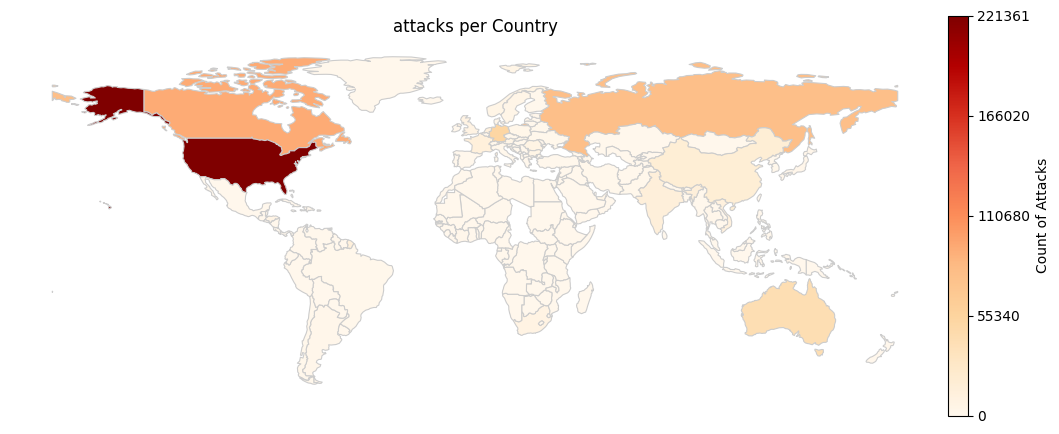

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame containing country codes and syllable counts
# Load the world map data using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map data with your data on the appropriate column containing ISO country codes
merged = world.set_index('iso_a3').join(country_with_attackers.set_index('iso_a3'))

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the choropleth map
vmax = country_with_attackers["count"].max()
vmin = 0
merged.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=vmin, vmax=vmax)

# Customize the plot
ax.set_title('attacks per Country')
ax.set_axis_off()

# Get the current axes instance and create a colorbar
cbar = ax.get_figure().get_axes()[1]
cbar.set_ylabel('Count of Attacks')  # You can customize the colorbar label as needed

# Shrink the colorbar
cbar.set_position([0.75, 0.3, 0.02, 0.4])  # Adjust the position and size as needed

# Set the ticks and labels for the colorbar
cbar.set_yticks([vmin, (vmax+vmin)//4, (vmax+vmin)//2, (vmax+vmin)//4*3 ,vmax])
cbar.set_yticklabels([vmin, (vmax+vmin)//4, (vmax+vmin)//2, (vmax+vmin)//4*3 ,vmax])

# Show the plot
plt.show()